## Analyzing E-Commerce Data Using Python

This data is typical for what you'd see for an ecommerce website. It contains session data with traffic source, location and transcation info. Other data has been anonymized. We will be using Python to analyze this dataset, getting more insights into what is driving sales on this particular day.

![E-Commerce](https://www.salesforce.com/blog/wp-content/uploads/sites/2/2023/11/SF_Blog_Image_Ecommerce_Changing_Everything.png?w=889)

## Step 1: Import Packages 📦
I'll be using `pandas` and `plotly` for this project.

In [1]:
# Import Packages
import pandas as pd
import plotly.express as px

## Step 2: Import the Data ⬇️
We are going to import the CSV file using `pd.read_csv("file.csv")`


In [2]:
ecomm_data = pd.read_csv("sample_data - ga_sessions.csv")

ecomm_data.head()

,visitId,visitStartTime,visitNumber,channelGrouping,browser,operatingSystem,deviceCategory,continent,subContinent,country,transactions
0,1501591568,1501591568,1,Organic Search,Chrome,Windows,desktop,Europe,Southern Europe,Greece,NaN
1,1501589647,1501589647,2,Referral,Chrome,Windows,desktop,Asia,Southern Asia,India,NaN
2,1501616621,1501616621,1,Referral,Chrome,Windows,desktop,Europe,Northern Europe,United Kingdom,NaN
3,1501601200,1501601200,1,Referral,Firefox,Windows,desktop,Americas,Northern America,United States,NaN
4,1501615525,1501615525,1,Referral,Chrome,Windows,desktop,Americas,Northern America,United States,NaN


## Step 3: Clean the Data 🧹
I will be inspecting the type of columns, and make some neccessary changes and adjustments if it is required.

In [3]:
ecomm_data.dtypes

visitId              int64
visitStartTime       int64
visitNumber          int64
channelGrouping     object
browser             object
operatingSystem     object
deviceCategory      object
continent           object
subContinent        object
country             object
transactions       float64
dtype: object

#### Changing Datatypes

1) I noticed that the 'visitStartTime' column is an `int` datatype. Let me change it to the `datetime` datatype.
- Keep in mind that the unit you specify should match the unit of the timestamps in your data to ensure accurate conversion to datetime objects. (it is up to seconds for this column, hence units = "s")

2) I also noticed that the 'transactions' column is a `float` datatype. Let me change it to the `int` datatype.
- Do check that the column does not have any empty/NaN values, else the datatype conversion will not work.

In [4]:
# It is a good habit to create a copy of the original df and save it into a new df name
ecomm_data_clean = ecomm_data.copy()

# This line of code is converting the values in the 'visitStartTime' column from seconds 
ecomm_data_clean["visitStartTime"] = pd.to_datetime(ecomm_data_clean['visitStartTime'], unit="s")

# Any missing values will be replaced with 0.
ecomm_data_clean["transactions"] = ecomm_data_clean["transactions"].fillna(0)

# The "transactions" column in the ecomm_data_clean DataFrame will contain integer values, 
ecomm_data_clean["transactions"] = ecomm_data_clean["transactions"].astype("int")

ecomm_data_clean


,visitId,visitStartTime,visitNumber,channelGrouping,browser,operatingSystem,deviceCategory,continent,subContinent,country,transactions
0,1501591568,2017-08-01 12:46:08,1,Organic Search,Chrome,Windows,desktop,Europe,Southern Europe,Greece,0
1,1501589647,2017-08-01 12:14:07,2,Referral,Chrome,Windows,desktop,Asia,Southern Asia,India,0
2,1501616621,2017-08-01 19:43:41,1,Referral,Chrome,Windows,desktop,Europe,Northern Europe,United Kingdom,0
3,1501601200,2017-08-01 15:26:40,1,Referral,Firefox,Windows,desktop,Americas,Northern America,United States,0
4,1501615525,2017-08-01 19:25:25,1,Referral,Chrome,Windows,desktop,Americas,Northern America,United States,0
...,...,...,...,...,...,...,...,...,...,...,...
2551,1501638264,2017-08-02 01:44:24,1,Referral,Chrome,Macintosh,desktop,Americas,Northern America,United States,0
2552,1501605330,2017-08-01 16:35:30,1,Organic Search,Chrome,Macintosh,desktop,Americas,Northern America,United States,0
2553,1501615026,2017-08-01 19:17:06,3,Organic Search,Chrome,Macintosh,desktop,Americas,Northern America,United States,0
2554,1501627131,2017-08-01 22:38:51,16,Organic Search,Chrome,Windows,desktop,Americas,Northern America,United States,1


#### Taking another look at the datatypes:

In [5]:
ecomm_data_clean.dtypes

visitId                     int64
visitStartTime     datetime64[ns]
visitNumber                 int64
channelGrouping            object
browser                    object
operatingSystem            object
deviceCategory             object
continent                  object
subContinent               object
country                    object
transactions                int64
dtype: object

Both datatypes for 'visitStartTime' and 'transactions' have been successfully changed! 😁

## Step 4: Explore the Data 🤔
I love to explore my data visually, so let us take a look at it together!

In [39]:
# Learnt to write this function from a professor from school and I've been using it ever since!

def plot_sessions_per_group(df, column_name, viz_type = "bar"): # bar chart will show if viz_type is not specified
    # What this portion does is [1] Group by the Selected Column Name [2] .size() is used to count the number of occurences in each group
    # [3] .reset_index(name = "this is the column name of the counts") [4] .sort_values(by = "this is the column name of the counts")
    sessions_per_group = df.groupby(column_name).size().reset_index(name = "sessions").sort_values(by = "sessions")
    if viz_type == "bar":
            fig = px.bar(sessions_per_group,
                      x = column_name,
                      y = "sessions",
                      title = f'Number of Sessions per {column_name.capitalize()}', #.capitalize() is used to cap the first letter of the word
                      text = "sessions"
                      )
            
            fig.update_yaxes(title_text = "Session Count") # Generate y-axis in plotly (follow the exact syntax)
            fig.update_xaxes(title_text = "Browser") # Generate x-axis in plotly (follow the exact syntax)
            fig.show("png")

    elif viz_type == "pie":
            fig = px.pie(sessions_per_group,
                      names = column_name,
                      values = "sessions",
                      title = f"Distribution of Sessions per {column_name.capitalize()}")
            fig.show("png")

    
    else:
        raise ValueError("viz_type can only be 'bar or 'pie'. Please try again!")

### Task 1: Find out the number of sessions per browser.

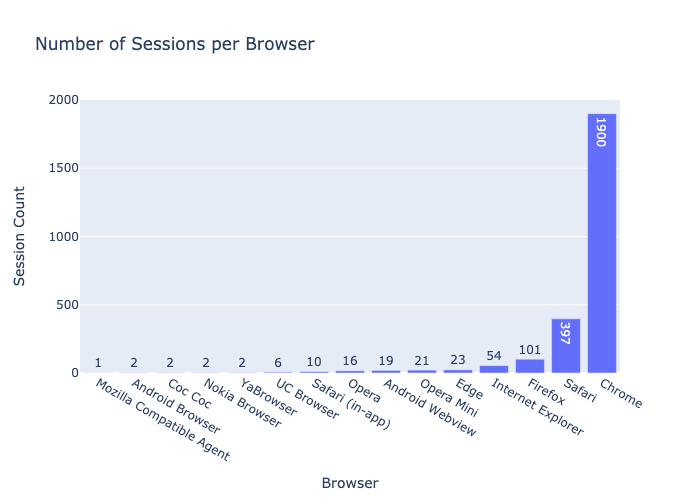

<Figure size 1200x600 with 0 Axes>

In [40]:
plot_sessions_per_group(ecomm_data_clean, "browser")

##### Insights:
1) It appears that Google Chrome is the most commonly used browser, followed by Safari and Firefox

Google Chrome is known for its fast performance, user-friendly interface, and seamless integration with other Google services. As a result, it has become the most popular browser globally, capturing a significant market share.

### Task 2: Find out the number of sessions per channelGrouping

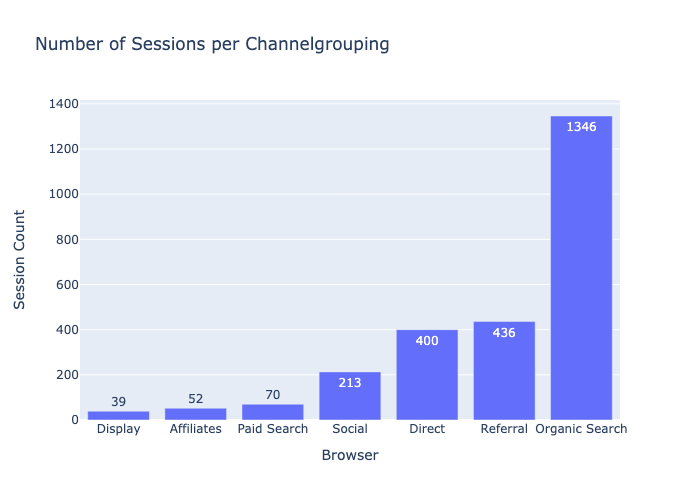

<Figure size 1200x600 with 0 Axes>

In [41]:
plot_sessions_per_group(ecomm_data_clean, "channelGrouping", "bar")

Insights:
1) Organic search traffic is considered valuable to e-commerce websites because it typically represents users who are actively seeking out products or services and are more likely to convert into customers.

### Task 3: Find out the Distribution of sessions per DeviceCategory

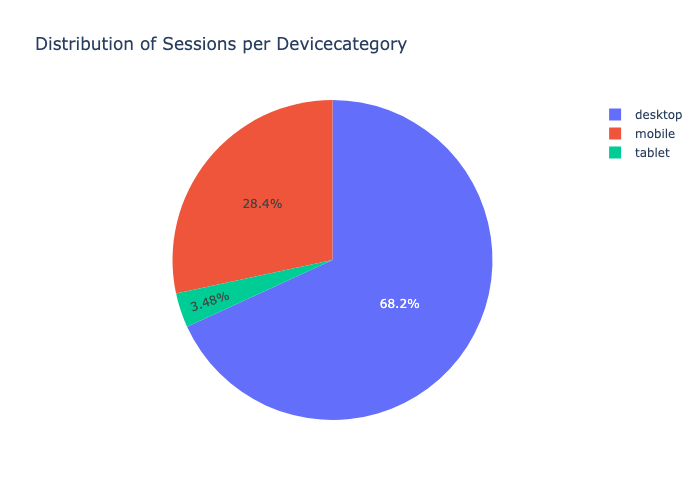

In [42]:
plot_sessions_per_group(ecomm_data_clean, "deviceCategory", viz_type="pie")


Insights:
1) It seems that desktop devices are the most common entry point for shopping sessions, followed by mobile devices and then tablets.

### Task 4: Find out the number of sessions per Continent

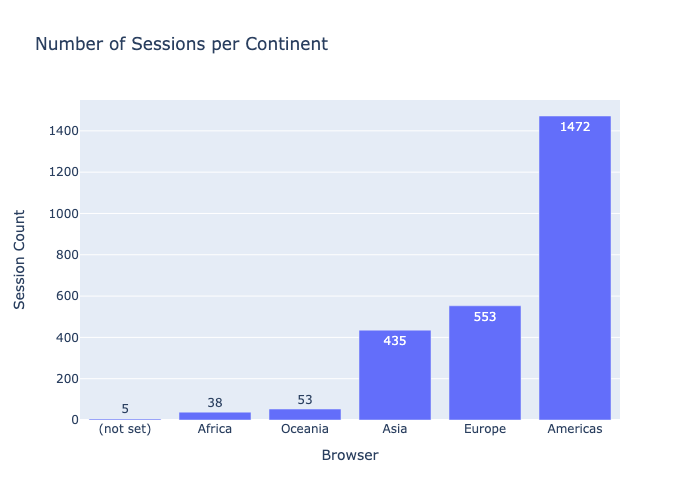

<Figure size 1200x600 with 0 Axes>

In [43]:
plot_sessions_per_group(ecomm_data_clean, "continent", viz_type="bar")

### Task 5: Show hourly visits per channelGrouping

/var/folders/ql/7h35fnyd76n8h2vchtfz1fbc0000gn/T/ipykernel_25623/2763365478.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



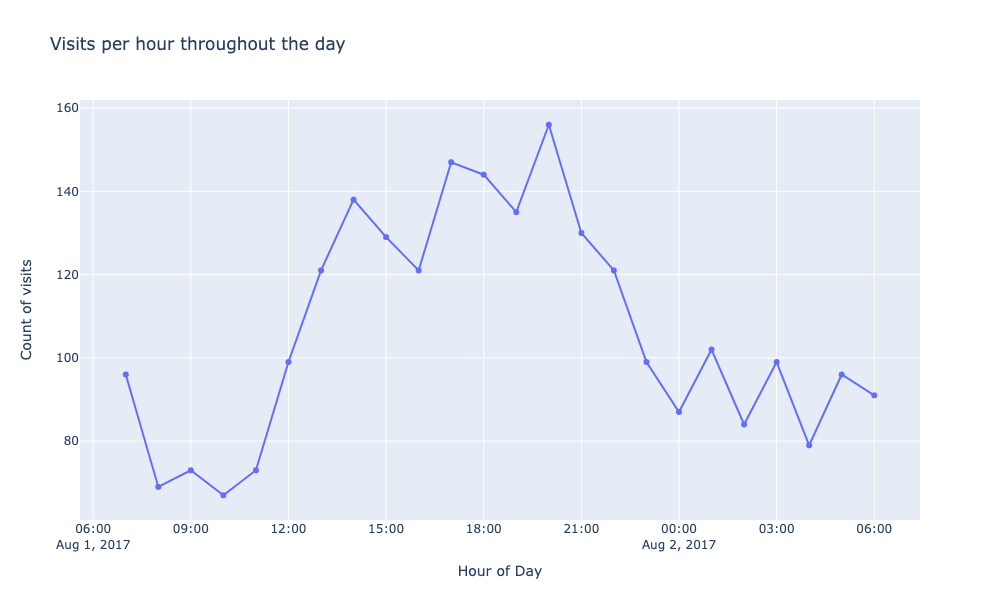

In [56]:
ecomm_data_clean["visitStartTime"] = ecomm_data_clean["visitStartTime"].dt.tz_convert("America/Los_Angeles")
ecomm_data_clean["hour"] = ecomm_data_clean["visitStartTime"].dt.to_period("H")
visits_per_month = ecomm_data_clean.groupby(["hour"]).size().reset_index(name = "visits")
visits_per_month["hour"] = visits_per_month["hour"].astype(str)

fig = px.line(visits_per_month, x= "hour", y = "visits", title = "Visits per hour throughout the day", markers = True)
fig.update_xaxes(title_text = "Hour of Day")
fig.update_yaxes(title_text = "Count of visits")

fig.update_layout(
    width=1000,  # Specify the width in pixels
    height=600,  # Specify the height in pixels
)

fig.show("png")


### Task 6: Show Channel Grouping Visits per hour throughout the day

/var/folders/ql/7h35fnyd76n8h2vchtfz1fbc0000gn/T/ipykernel_25623/658608247.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



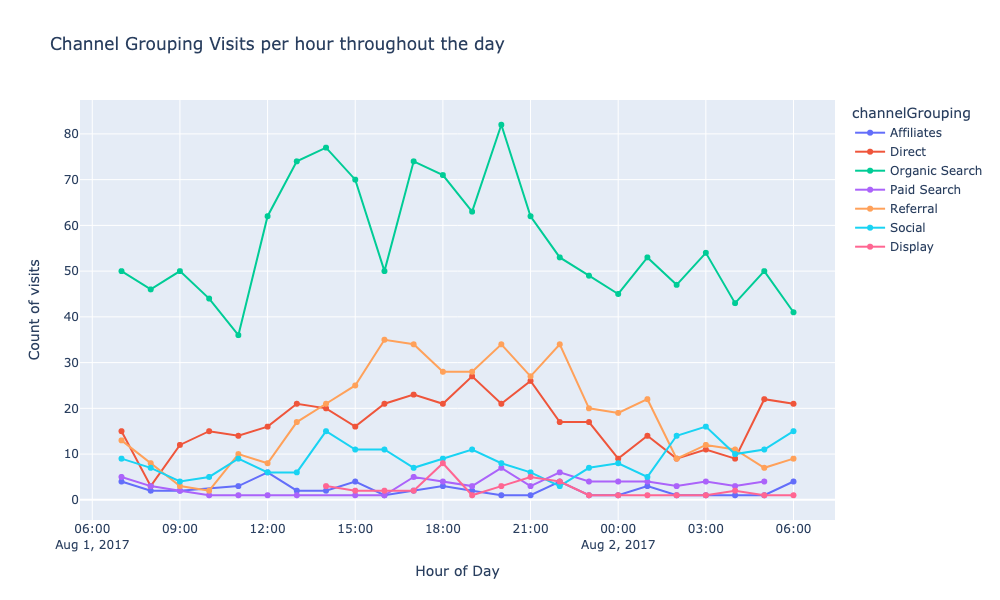

In [54]:
ecomm_data_clean["visitStartTime"] = ecomm_data_clean["visitStartTime"].dt.tz_convert("America/Los_Angeles")
ecomm_data_clean["hour"] = ecomm_data_clean["visitStartTime"].dt.to_period("H")
visits_per_month = ecomm_data_clean.groupby(["hour","channelGrouping"]).size().reset_index(name = "visits")
visits_per_month["hour"] = visits_per_month["hour"].astype(str)

fig = px.line(visits_per_month, x= "hour", y = "visits", title = "Channel Grouping Visits per hour throughout the day", color = "channelGrouping", markers = True)
fig.update_xaxes(title_text = "Hour of Day")
fig.update_yaxes(title_text = "Count of visits")

fig.update_layout(
    width=1000,  # Specify the width in pixels
    height=600,  # Specify the height in pixels
)

fig.show("png")


### Task 7: Which Channel leads to the most transactions per session?

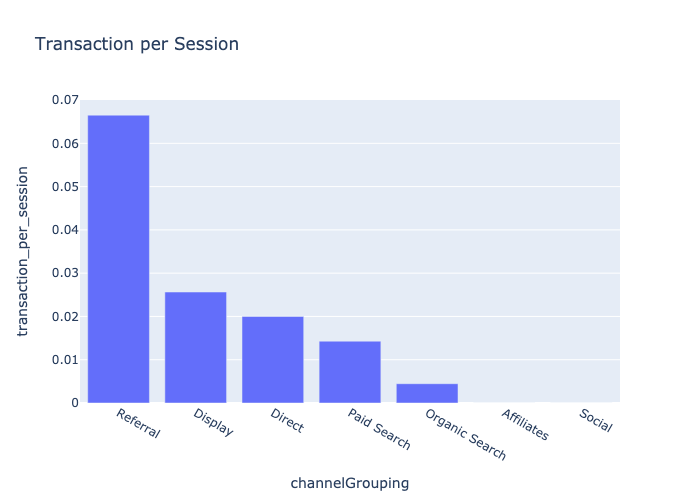

In [59]:
channel_grouping_stats = (
    ecomm_data_clean
    .groupby("channelGrouping")
    .agg({"transactions" : "sum", "visitId" : "size"})
    .reset_index()
    )

# Calculating the transaction per session
channel_grouping_stats["transaction_per_session"] = channel_grouping_stats["transactions"] / channel_grouping_stats["visitId"]
channel_grouping_stats.sort_values(by = "transaction_per_session", inplace = True, ascending = False)

fig = px.bar(channel_grouping_stats,
        x = "channelGrouping",
        y = "transaction_per_session",
        title = "Transaction per Session")

fig.show("png")

### Thank you for taking time to view my project! 😊